<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to Random Variables and Common Distributions

_Authors: Kiefer Katovich (SF)_

---

### Learning Objectives
- Understand what defines a random variable.
- Understand the difference between discrete and continuous variables.
- Understand the difference between probability mass functions and probability density functions.
- Understand what defines cumulative distribution function.
- Explore the most common statistical distributions and their applications.


### Lesson Guide

- [Random Variables](#random_variables)
- [Discrete Uniform Distribution](#discrete_uniform)
- [Cumulative Distribution Function](#cumulative_distribution)
- [Bernoulli Distribution](#bernoulli)
- [Binomial Distribution](#binomial)
- [Geometric Distribution](#geometric)
- [Negative Binomial Distribution](#negative_binomial)
- [Hypergeometric Distribution](#hypergeometric)
- [Poisson Distribution](#poisson)
- [Exponential Distribution](#exponential)
- [Normal Distribution](#normal)

<a id='random_variables'></a>

### Random variables

---
Random variables are quantities that can take on values with associated probabilities.

The canonical example is a fair coin flip: This is a random variable that can take on a value of 1 or 0, each with a probability of 0.5.

Random variables can be divided into two categories:

**Discrete random variables**

Discrete random variables have outcomes that are "countable." The number of heads in a series of coin flips, for example, or the number of aces drawn in a series of hands from a deck of cards. Each discrete outcome has an associated probability of occuring.
For discrete random variables, the distribution of the probabilities of each outcome is called the **probability mass function (pmf)**.

**Continuous random variables**

Continuous random variables, on the other hand, have outcomes that are not countable. Say, for example, $T$ is a random variable representing the temperature at noon. There aren't exact temperature outcomes with associated probabilities of occurance — the number of possible outcomes is infinite. The probabilities of ranges of values are calculated as areas under the **probability density function (pdf)**, which is the probability function associated with continuous variables.

In [46]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='discrete_uniform'></a>

### The Discrete Uniform Distribution: Rolling a Die

---

Imagine we are rolling a fair die. The outcome of rolling the die is represented by a random variable $X$, which can take on values 1 through 6. $X$ is therefore a discrete random variable.

The probability mass function $f$ over the six possible outcomes $k$ - each with an associated probability $p$ - is defined as:

$$  \text{pmf} = f(k; p) =
    \begin{cases}
    0.1\overline{66} & \text{for }k=1 \\ 
    0.1\overline{66} & \text{for }k=2 \\
    0.1\overline{66} & \text{for }k=3 \\
    0.1\overline{66} & \text{for }k=4 \\
    0.1\overline{66} & \text{for }k=5 \\
    0.1\overline{66} & \text{for }k=6
    \end{cases}
$$

This is an example of the **discrete uniform distribution**, as all of the outcomes have the same probability. If you plot the probability mass function, you can see that the probability histogram is uniform.

**Below is a function that will plot a discrete probability mass function across a range of values for a supplied `scipy` distribution object.**

In [72]:
def plot_discrete_pmf(low, high, title, stats_dist=None, lw=20):
    
    if stats_dist is None:
        discrete = stats.randint(low, high+1)
    else:
        discrete = stats_dist
    
    x = np.arange(low-1., high+1.)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel('Outcomes', fontsize=16)
    ax.set_ylabel('Probability Mass Function (pmf)', fontsize=16)
    ax.vlines(x, 0, discrete.pmf(x), colors='darkred', lw=lw, alpha=0.6)
    ax.set_ylim(0, np.max(discrete.pmf(x))+0.03)
    
    plt.title(title, fontsize=20)

    plt.show()

#### As we will be using this function several times today lets define some brief documentation for reference.
- **low** : int - The minimum possible _numeric_ value an outcome can be. 
- **high** : int - The maximum possible _numeric_ value an outcome can be. 
- **title** : str - Used for naming the resulting chart.
- **stats_dist** : `Scipy` generated distribution or None(default is None) - Specified type of distribution that can also use various probababilities and trials.  If `None` is specified distribution and probabilties are uniform.  
- **lw** :  int or float (default is 20) - line width for bars on chart.

**Use the function to plot the discrete uniform distribution.**

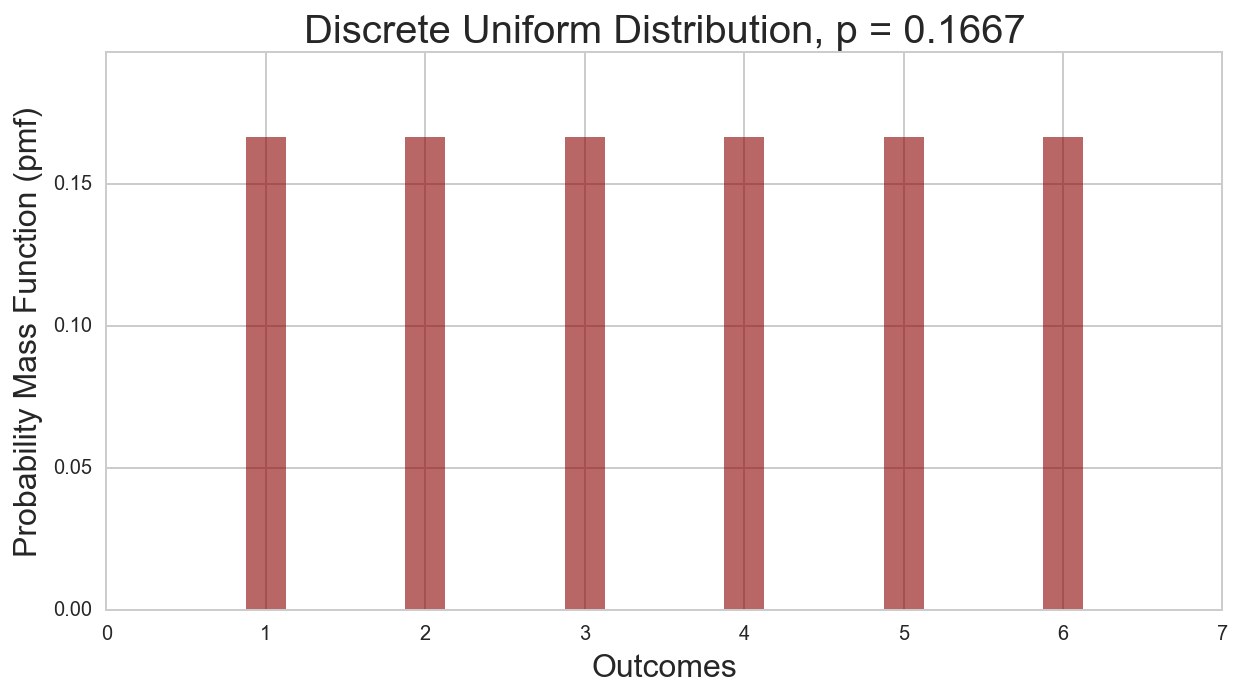

In [48]:
plot_discrete_pmf(1,6,title='Discrete Uniform Distribution, p = 0.1667')

<a id='cumulative_distribution'></a>

### The Cumulative Distribution Function (CDF)

---

Using the same die example as above, we can also plot out the cumulative probability of our six outcomes. This is known as the **cumulative distribution function** and is simply the cumulative sum across increasing values of the probability mass or density function for a random variable.

Each point on a cumulative distribution function represents the probability that a random variable is less than or equal to that value.

**Below is a function that will plot a cumulative distribution function.**

In [49]:
def plot_discrete_cdf(low, high, title='Discrete', stats_dist=None):
    
    if stats_dist is None:
        discrete = stats.randint(low, high+1)
    else:
        discrete = stats_dist
        
    x = np.linspace(low-1, high+1, 300)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))

    ax.set_ylim(0, 1.1)
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel('Outcomes', fontsize=16)
    ax.set_ylabel('Cumulative Distribution Function (cdf)', fontsize=16)
    
    ax.plot(x, discrete.cdf(x), lw=4, color='darkblue')
    
    plt.title(title, fontsize=20)

    plt.show()

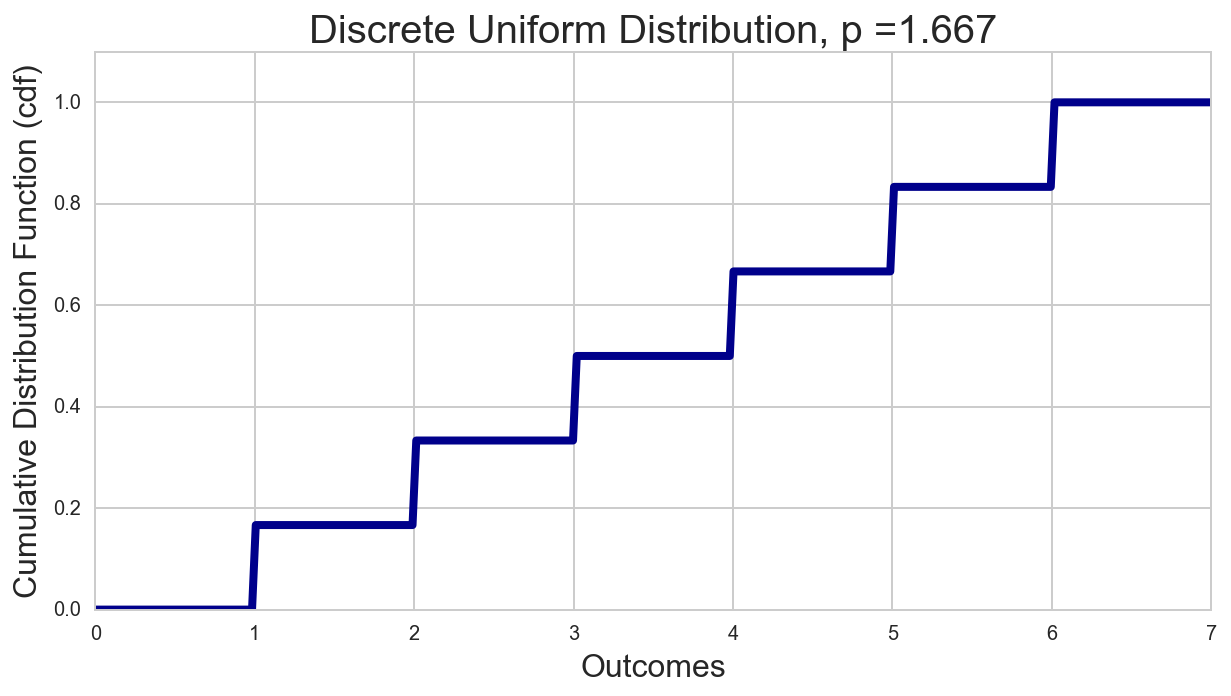

In [50]:
plot_discrete_cdf(1, 6, 'Discrete Uniform Distribution, p =1.667')

<a id='bernoulli'></a>

### The Bernoulli distribution

---

When the outcome of a random variable is binary it is known as a "Bernoulli" distributed random variable. Typically, these outcomes are denoted with values of 0 and 1 .

Some common examples of a Bernoulli random variables include:

- A coin flip.
- Whether or not it will rain tomorrow.
- Whether or not a user will buy your product after visiting your website.

That last example - and Bernoulli distributed variables in general - will continually appear throughout the course, especially in the contexts of classification and split tests.

#### The Bernoulli probability mass function 

The probability mass function $f$ for outcomes $k$ and probabilities $p$ is:

### $$  pmf(k; p) =
    \begin{cases}
    p & \text{for }k=1 \\
    q=(1-p) & \text{for }k=0 \\ 
    \end{cases}
$$

Below is a PMF where $p(heads) = 0.25$, an unfair coin-flip.

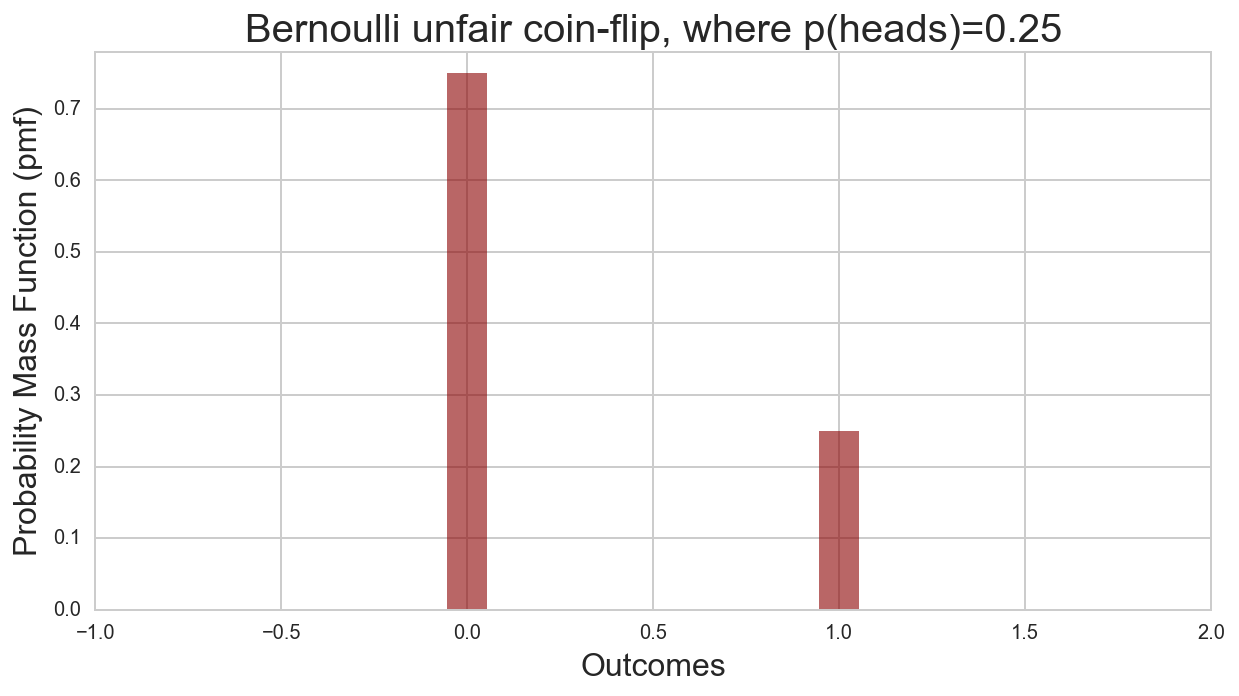

In [51]:
plot_discrete_pmf(0, 1, 'Bernoulli unfair coin-flip, where p(heads)=0.25', stats_dist=stats.bernoulli(0.25))

#### Bernoulli cumulative distribution function

Its cumulative distribution function is also defined as a function of $k$ outcomes with $p$ probabilities:

### $$ cdf(k; p) =
\begin{cases}
    0 & \text{for }k<0 \\ 1 - p & \text{for }0\leq k<1 \\ 1 & \text{for }k\geq 1
\end{cases} $$

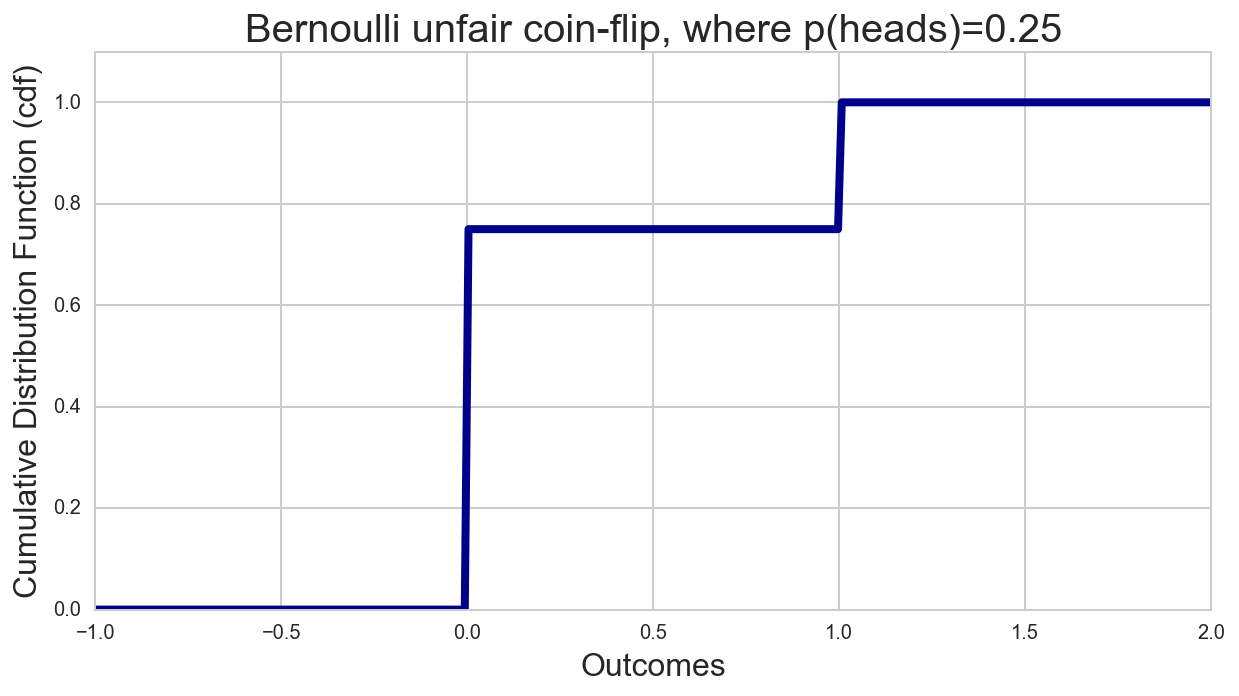

In [52]:
plot_discrete_cdf(0, 1,'Bernoulli unfair coin-flip, where p(heads)=0.25', stats_dist=stats.bernoulli(0.25))

<a id='binomial'></a>

### The Binomial distribution

---

The binomial distribution is directly related to the Bernoullli distribution: it is **the sum of positive outcomes of a Bernoulli distributed random variable.**

Whereas the Bernoulli distribution represented a single binary outcome and it's probability of occuring, the binomial has a parameter $n$ for the number of "trials".

It is important to note that each trial, or event, must be independent and have the same probability of success in order to be represented with the binomial distribution. 

#### Binomial probability mass function

The probability mass function is a function of $n$ trials with $p$ probability of success and $k$ successes in those trials:

### $$ pmf(k;n,p) = P(X = k) = \binom n k  p^k(1-p)^{n-k} $$

Which describes the probability that there will be $k$ successes in $n$ trials.

Below is the binomial PMF for 50 coin flips, with probability of getting heads at 25%.


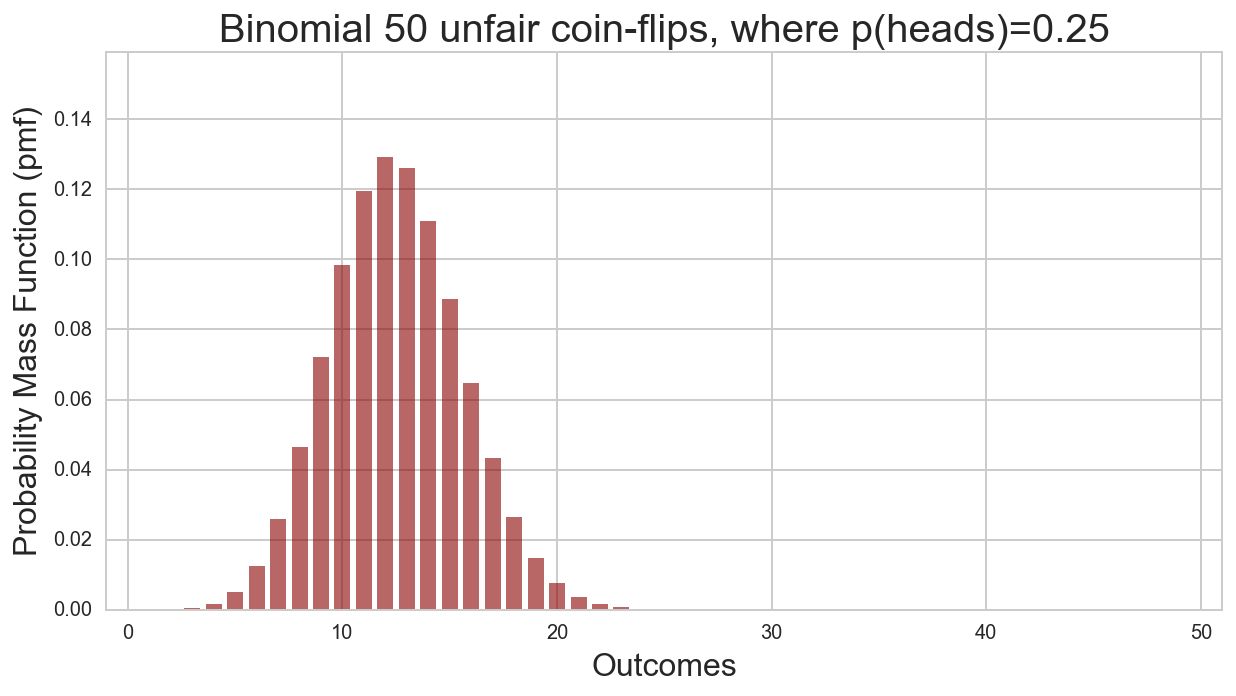

In [53]:
plot_discrete_pmf(0, 50, 'Binomial 50 unfair coin-flips, where p(heads)=0.25', stats.binom(50,0.25), lw=8)

#### Binomial cumulative distribution function

The cumulative distribution function for the binomial distribution is:

### $$ cdf(k;n,p) = P(X \le k) = \sum_{i=0}^{\lfloor k \rfloor} {n\choose i}p^i(1-p)^{n-i} $$

( $\lfloor k \rfloor$ is the greatest integer less than or equal to $k$ – this ensures that the CDF can still be represented continuously).

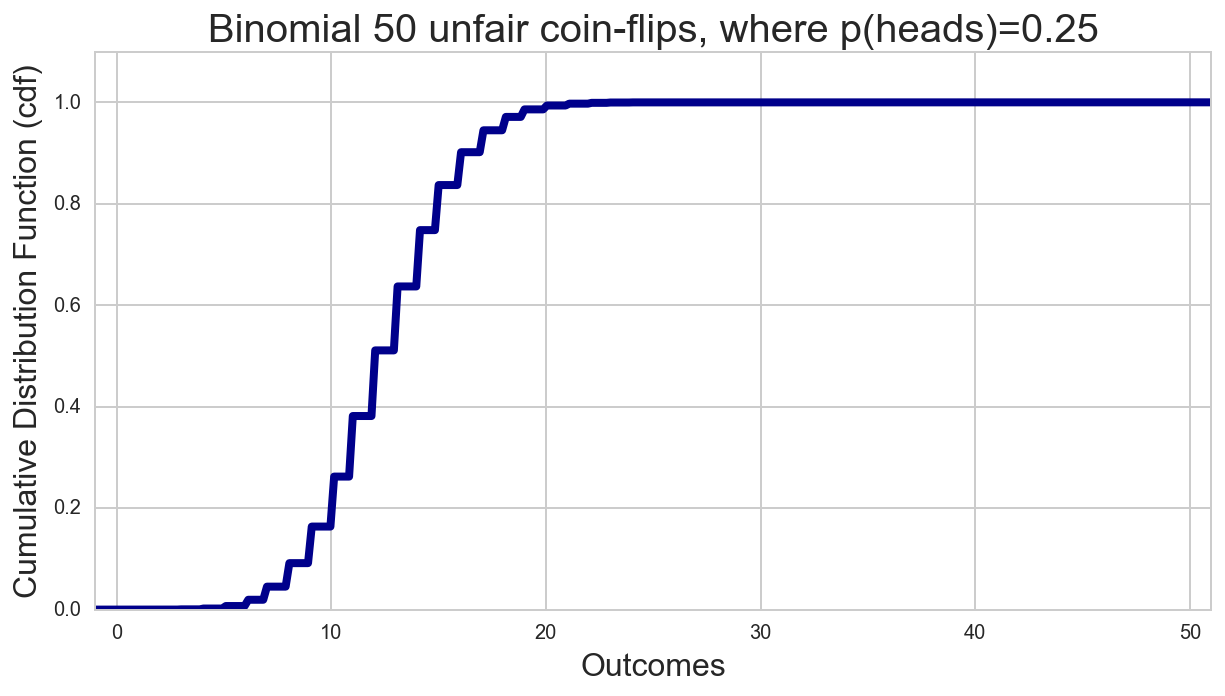

In [54]:
plot_discrete_cdf(0, 50,'Binomial 50 unfair coin-flips, where p(heads)=0.25', stats.binom(50,0.25))

<a id='geometric'></a>

### The Geometric distribution

---

The Binomial distribution asked how many $k$ successes occur in $n$ trials. The geometric distribution asks **how many "failure" trials occur prior to the first "success" trial?**

So, in the canonical coin flip example, how may times do we flip the coin and get tails before we get our first heads (given a probability of heads $p$)?

A couple of points to consider:

1. These are Bernoulli trials with a probability of success $p$, just like in the Binomial distribution.
2. The trials are independent. This means that, if we were drawing cards to get a king, for example, the geometric distribution would measure the trials until we get a king _with replacement_,. i.e., we put the card back in the desk each time and shuffle before drawing again.

#### Geometric probabilty mass function

The geometric probability mass function is calculated as:

### $$ pmf(k; p) = (1 - p)^{k}\,p $$

Here, $k$ is the number of trials and $p$ is the probability of success on each trial.

Let's consider our example of drawing cards until we get a king (with replacement). The probability of getting a king is 4/52. So, the geometric PMF looks like this:

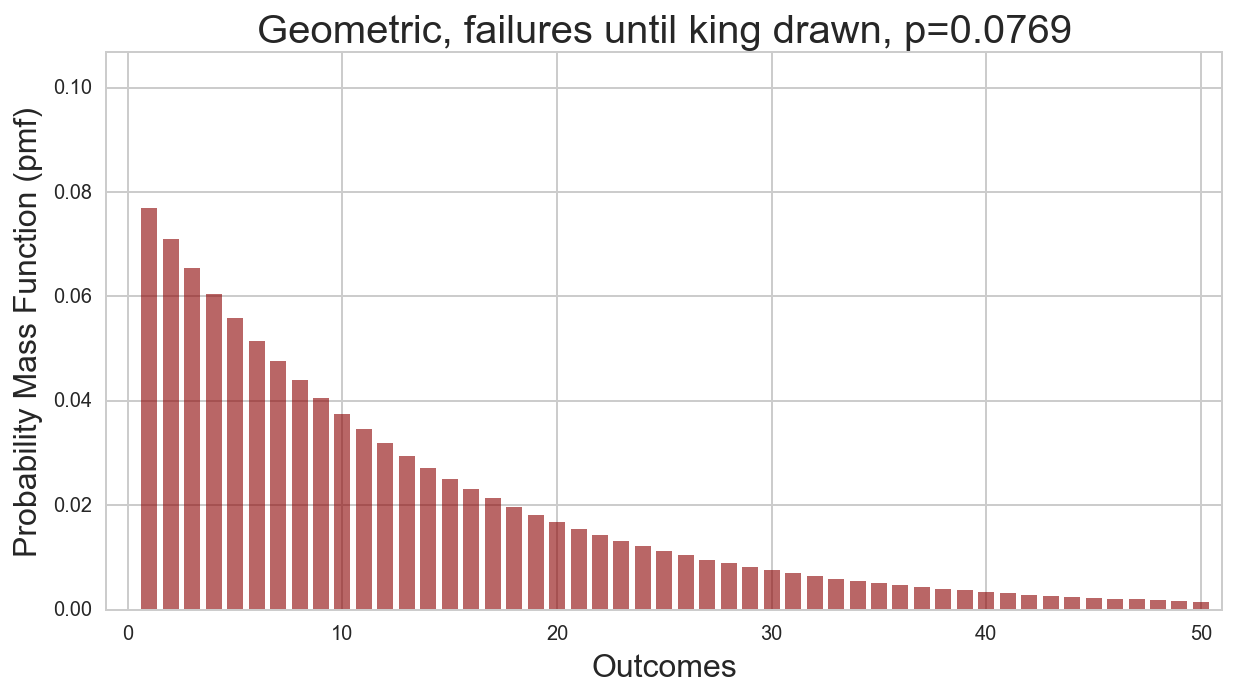

In [55]:
plot_discrete_pmf(0, 50, title='Geometric, failures until king drawn, p=0.0769', stats_dist=stats.geom(4./52), lw=8)

#### Geometric cumulative distribution function

Likewise, the geometric cumulative distribution function is:

### $$ cdf(k; p) = 1 - (1 - p)^{k+1} $$

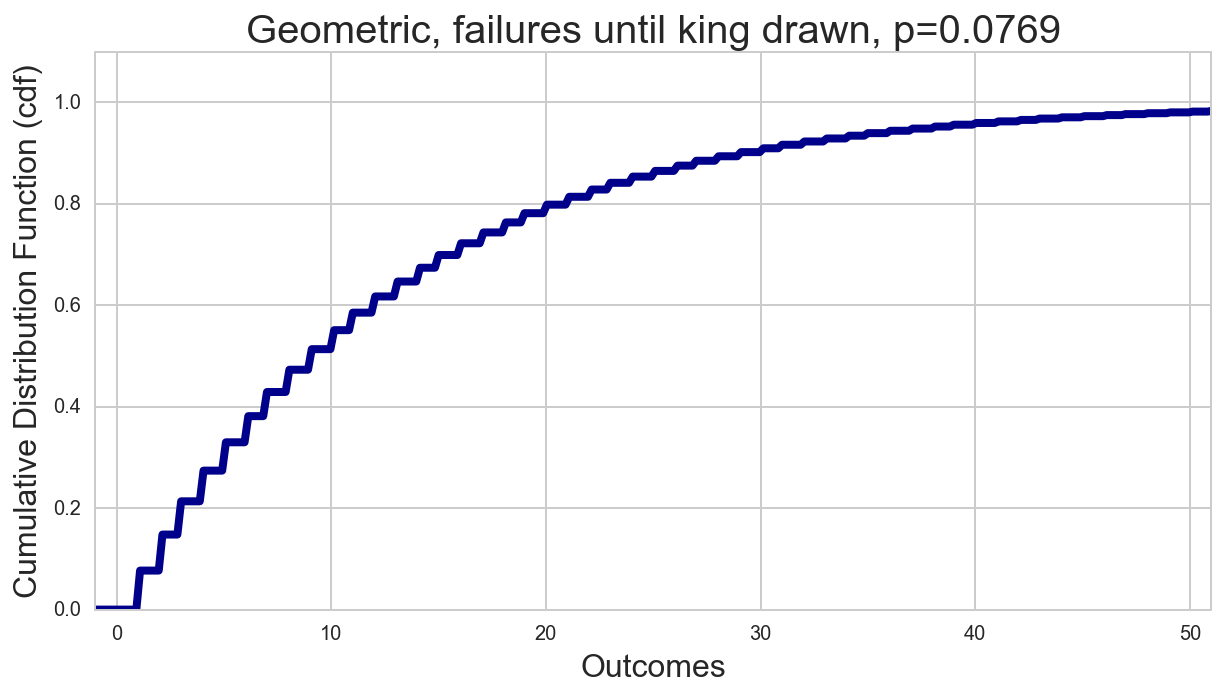

In [56]:
plot_discrete_cdf(0, 50, title='Geometric, failures until king drawn, p=0.0769', stats_dist=stats.geom(4./52))

<a id='negative_binomial'></a>

### The Negative Binomial Distribution

---

The negative binomial distribution is a generalization of the geometric distribution. Whereas the Geometric distribution represents the number of trials until the first success, **the negative binomial distribution represents the number of trials until the first $r$ successes.**

The geometric distribution is thus a special case of the negative binomial distribution in which $r = 1$. 

#### Negative binonmial probability mass function

### $$ pmf(k; r, p) = P(X = k) = \binom{k+r-1}{k} p^k(1-p)^r $$

Here, $k$ is the number of failures, $r$ is the number of successes, and $p$ is the rate

As an example, say we have a website. We want to measure the number of visitors who will come to the website before three purchase out product. We know that the probability $p$ of any one visitor purchasing our product is 0.05.


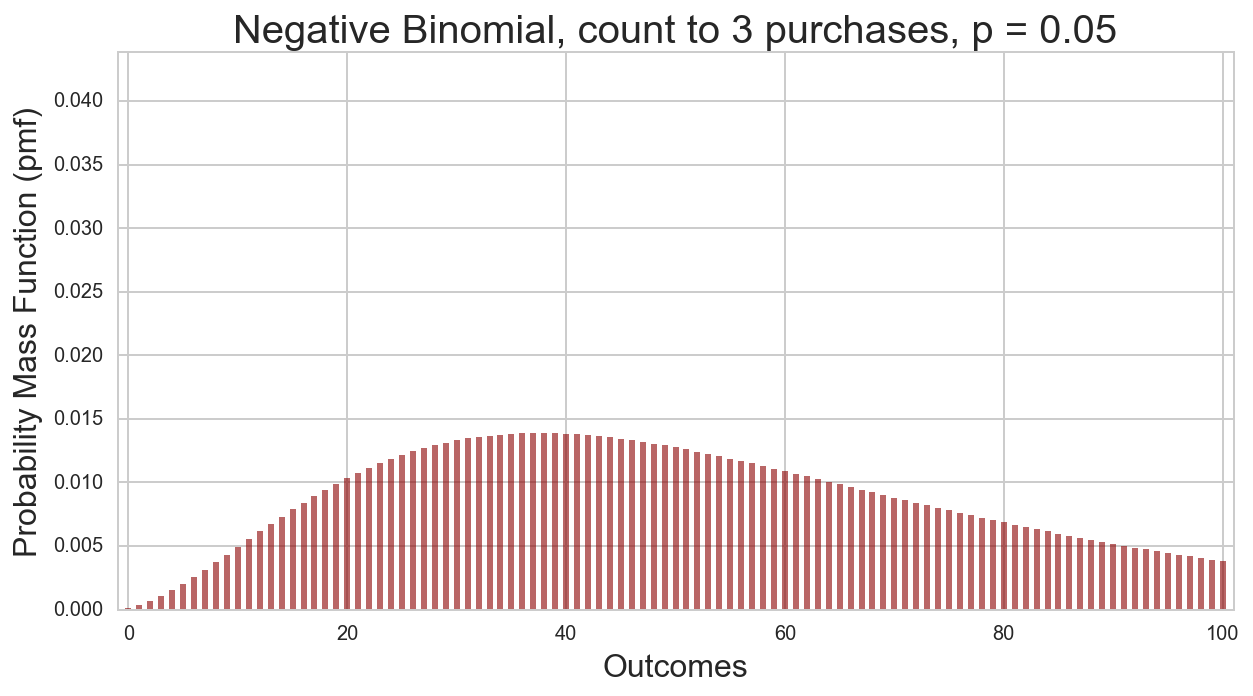

In [57]:
plot_discrete_pmf(0, 100,'Negative Binomial, count to 3 purchases, p = 0.05', stats_dist=stats.nbinom(3, 0.05), lw=3)

#### Negative binomial cumulative distribution function

[The cumulative distribution function is more complex, using a beta function.](https://en.wikipedia.org/wiki/Negative_binomial_distribution) I won't cover this now, but we can still plot the cumulative distribution using the plotting function we wrote.

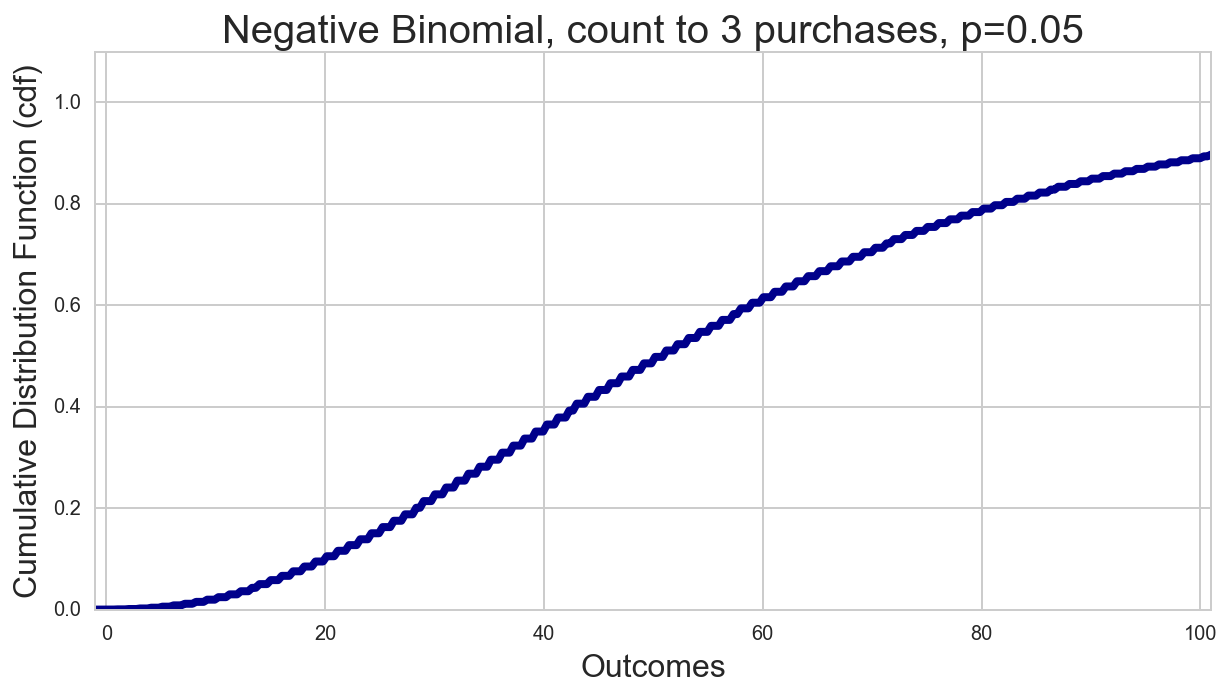

In [58]:
plot_discrete_cdf(0, 100,'Negative Binomial, count to 3 purchases, p=0.05', stats_dist=stats.nbinom(3, 0.05))

<a id='hypergeometric'></a>

### The Hypergeometric distribution

---

The hypergeometric distribution is directly related to the binomial and Bernoulli distributions. Imagine you are selecting cards from a deck. What is the probability that you will draw a heart from the deck each time, _without putting the cards back in?_

The binomial distribution would model the probability of drawing a heart when you select cards with _replacement_.

The hypergeometric distribution, on the other hand, models the probability of drawing a heart _without replacement_. This distribution is appropriate for use any time events are done without replacement.

#### Hypergeometric probabilty mass function

The Hypergeometric probability mass function is:

### $$  P(X = k) = \frac{\binom{K}{k} \binom{N - K}{n-k}}{\binom{N}{n}} $$

Here, $N$ is the total size of the "population" (52 cards),

$K$ is the total number of possible "successes" (13 hearts),

$n$ is the number of trials, or draws, and

$k$ is the number of successes in those draws.

The PMF across 20 draws looks like:

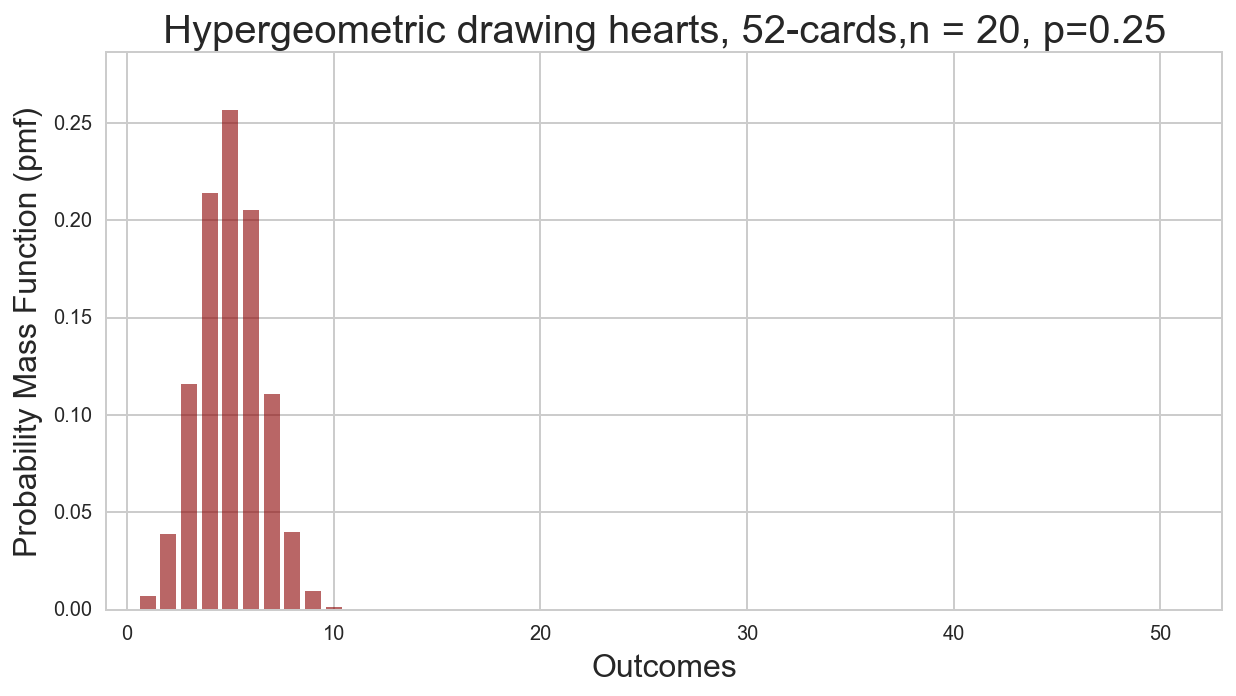

In [59]:
plot_discrete_pmf(0, 52,'Hypergeometric drawing hearts, 52-cards,n = 20, p=0.25', stats.hypergeom(52,13,20), lw=8)

#### Hypergeometric cumulative distribution function

[The cumulative distribution function for the hypergeometric is fairly complicated.](https://en.wikipedia.org/wiki/Hypergeometric_distribution)

We can plot out what it looks like for our scenario drawing 20 cards:

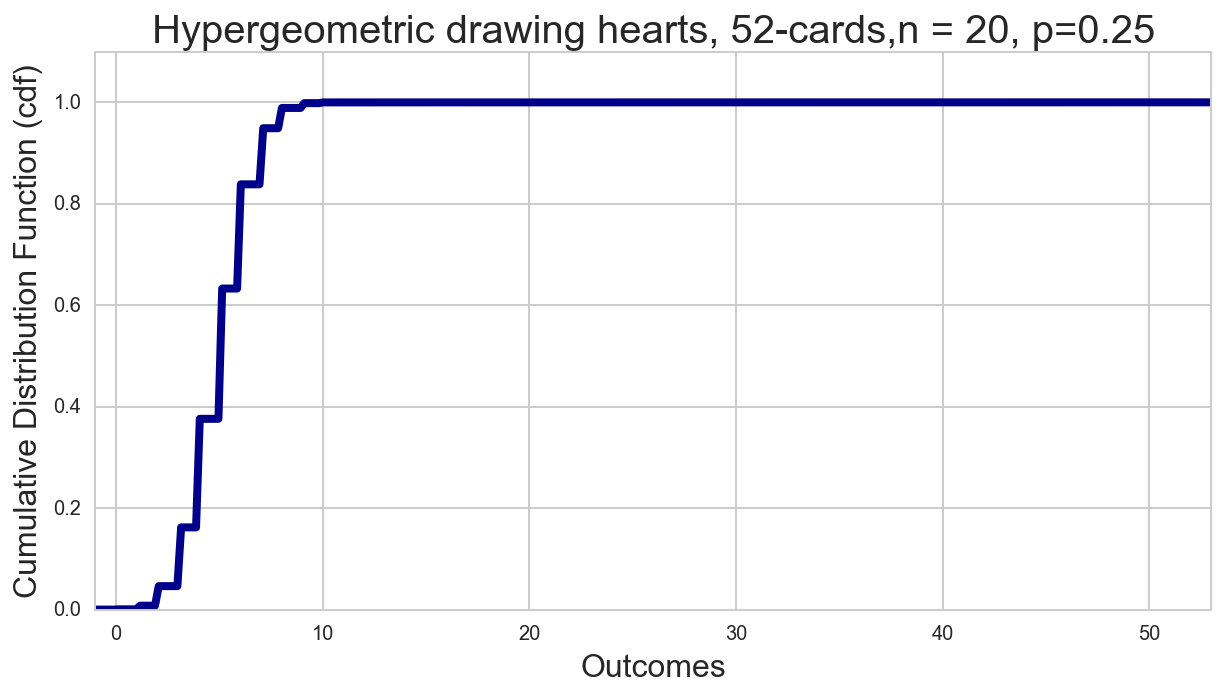

In [60]:
plot_discrete_cdf(0, 52,'Hypergeometric drawing hearts, 52-cards,n = 20, p=0.25', stats.hypergeom(52,13,20))

<a id='poisson'></a>

### The Poisson distribution

---

The Poisson distribution represents the counts of "positive" events, or successes, within a set time span. It shares a relationship with Bernoulli random variables and the binomial distribution.

A Bernoulli random variable represents the probability that an event will occur during a "trial." Imagine we had a Bernoulli random variable that was the probability of a user visiting our website between 12 p.m. and 1 p.m. If we change this to be between 12 p.m. and 12:15 p.m., it would remain a Bernoulli random variable but the probability would decrease. As the timeframe shrinks, the probability shrinks as well.

The Poisson distribution represents an infinite amount of many infinitely small probability trials. $n$ increases to infinity and $p$ shrinks toward zero, given that $np$ remains the same. The Poisson distribution is the binomial distribution taken to its continuous limit.

#### Poisson probability mass function

### $$P(k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

Here, $k$ is the number of events that occur in an interval,

and $\lambda$ is the rate at which events occur.

Let's say, for example, we are measuring visitors to our website. What is the probability mass function of the Poisson distribution for visitor counts, given that we have an average rate of 25 visitors per hour?

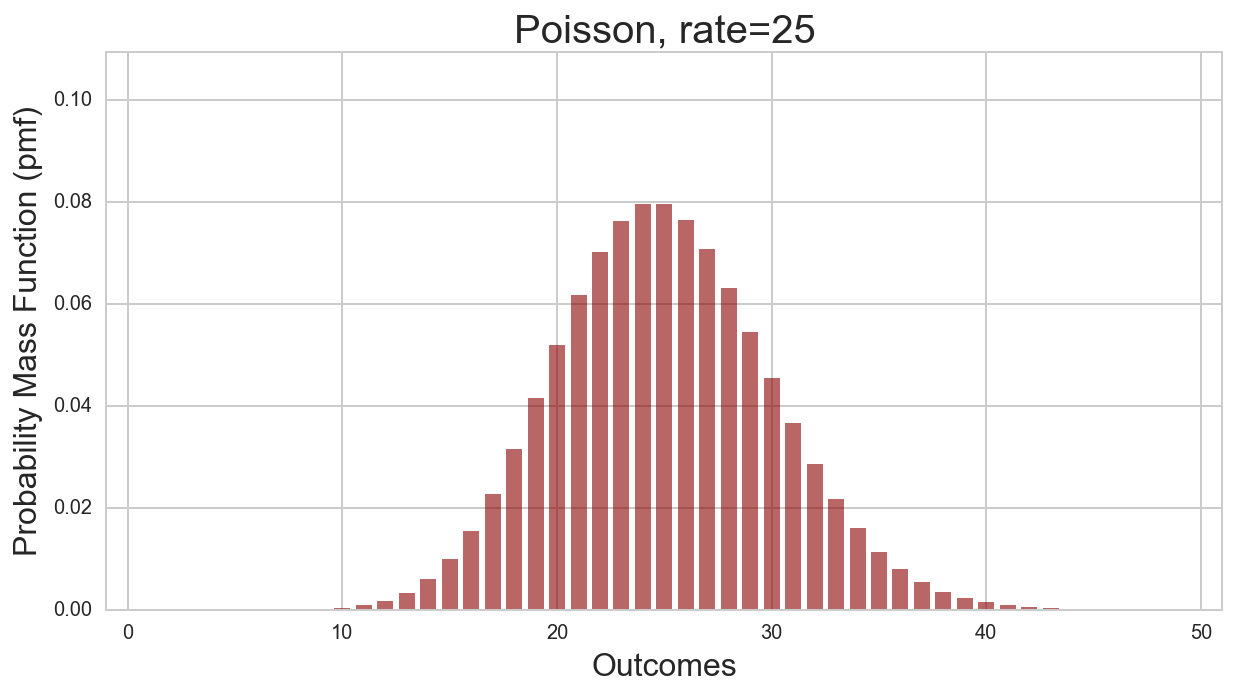

In [61]:
plot_discrete_pmf(0, 50, title='Poisson, rate=25', stats_dist=stats.poisson(25), lw=8)

What if the rate was 5 instead?

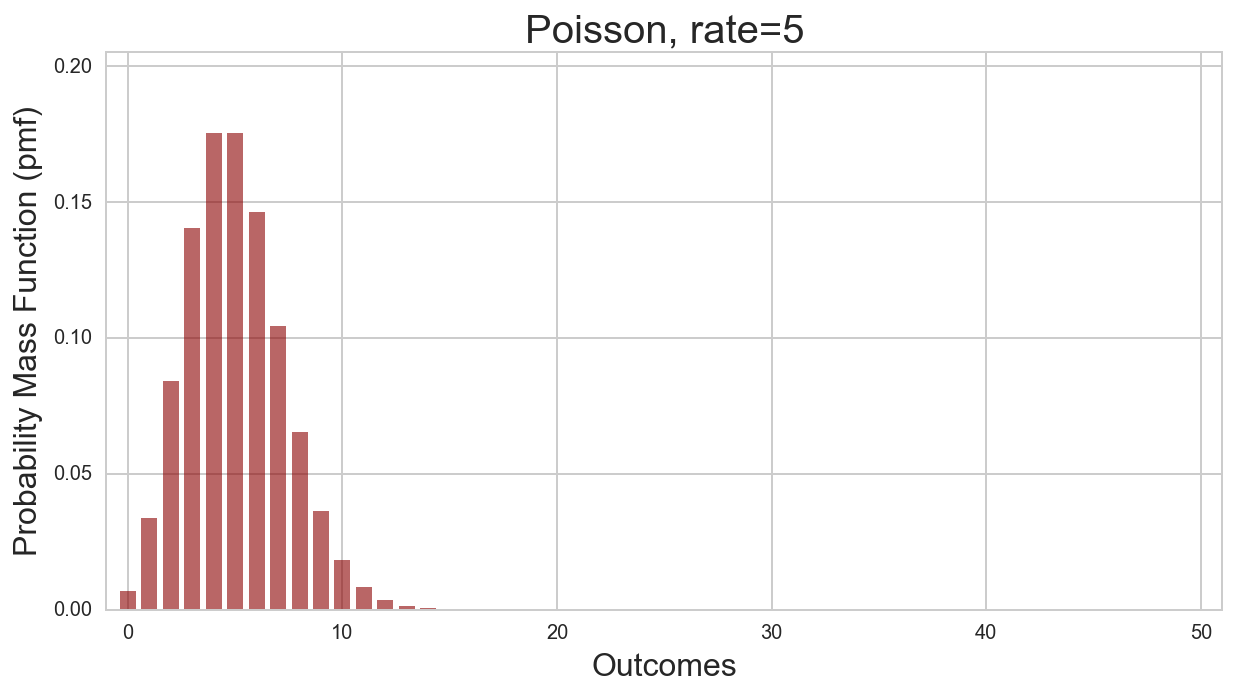

In [62]:
plot_discrete_pmf(0, 50, title='Poisson, rate=5', stats_dist=stats.poisson(5), lw=8)

#### Poisson cumulative distribution function

The cumulative distribution function is given by this formula:

### $$ e^{-\lambda} \sum_{i=0}^{\lfloor k\rfloor} \frac{\lambda^i}{i!} $$

Here again, the $\lfloor k\rfloor$ represents the greatest integer less than or equal to $k$.

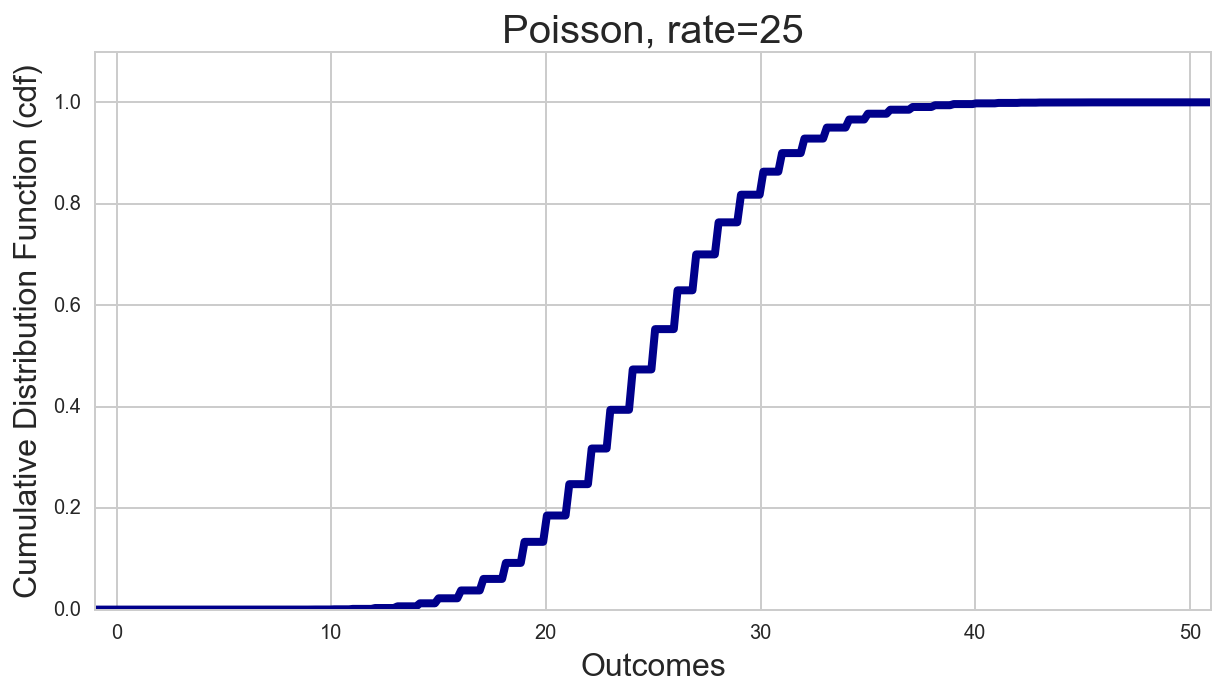

In [63]:
plot_discrete_cdf(0, 50, title='Poisson, rate=25', stats_dist=stats.poisson(25))

<a id='exponential'></a>

### The Exponential distribution

---

What if we were interested in how long it takes until something occurs, rather than how many events occur within a given timeframe? **The exponential distribution models the amount of time until an event occurs.**

Recall that the Poisson distribution is the binomial distribution taken to the limit, in which the event times are infinitesimally small ($p$ of an event goes to zero) but there are also infinitely many events ($n$ goes to infinity). Likewise, the exponential distribution is the geometric distribution taken to the same limit.

Where the geometric distribution measures the number of events _until_ a success, the exponential distribution measures the _amount of time until a success_.

This is our first instance of a continuous distribution, as time is a continuous measure.


#### Exponential probability density function

The exponential probability density function is defined as:

### $$ pdf(\lambda; t) = \lambda  e^{-\lambda t} $$

Here, $\lambda$ is the rate of event occurences,

and $t$ is the time elapsed.

Returning to our website example, we could ask: Given a rate of 10 visitors per hour, how long from now will we expect our next visitor to arrive?

**Below is a new plotting function for continuous probability density functions.**

In [64]:
def plot_continuous_pdf(low, high, title='Continuous',xlabel='Time', stats_dist=None, lw=5):
        
    x = np.arange(low, high+1.)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel('Probability Density Function (pdf)', fontsize=16)
    ax.plot(x, stats_dist.pdf(x), color='darkred', lw=lw)
    ax.set_ylim(0, np.max(stats_dist.pdf(x))+0.03)
    
    plt.title(title, fontsize=20)

    plt.show()

In [65]:
# plot_continuous_pdf(0, 60, title='Prob minutes to next visitor (10/hr)', 
#                      stats_dist=stats.expon(scale=1./(1./6.)), xlabel='Minutes')

**Next, here is a function to plot continuous cumulative density functions:**

In [66]:
def plot_continuous_cdf(low, high, title='Continuous', xlabel='Time', stats_dist=None):
        
    x = np.linspace(low, high+1, 300)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))

    ax.set_ylim(0, 1.1)
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel('Cumulative Distribution Function (cdf)', fontsize=16)
    
    ax.plot(x, stats_dist.cdf(x), lw=4, color='darkblue')

    plt.title(title, fontsize=20)

    plt.show()

#### Exponential cumulative distribution function

The cumulative distribution function is:

### $$ cdf(\lambda; t) = 1 -  e^{-\lambda t} $$

With the same example, our CDF looks like:

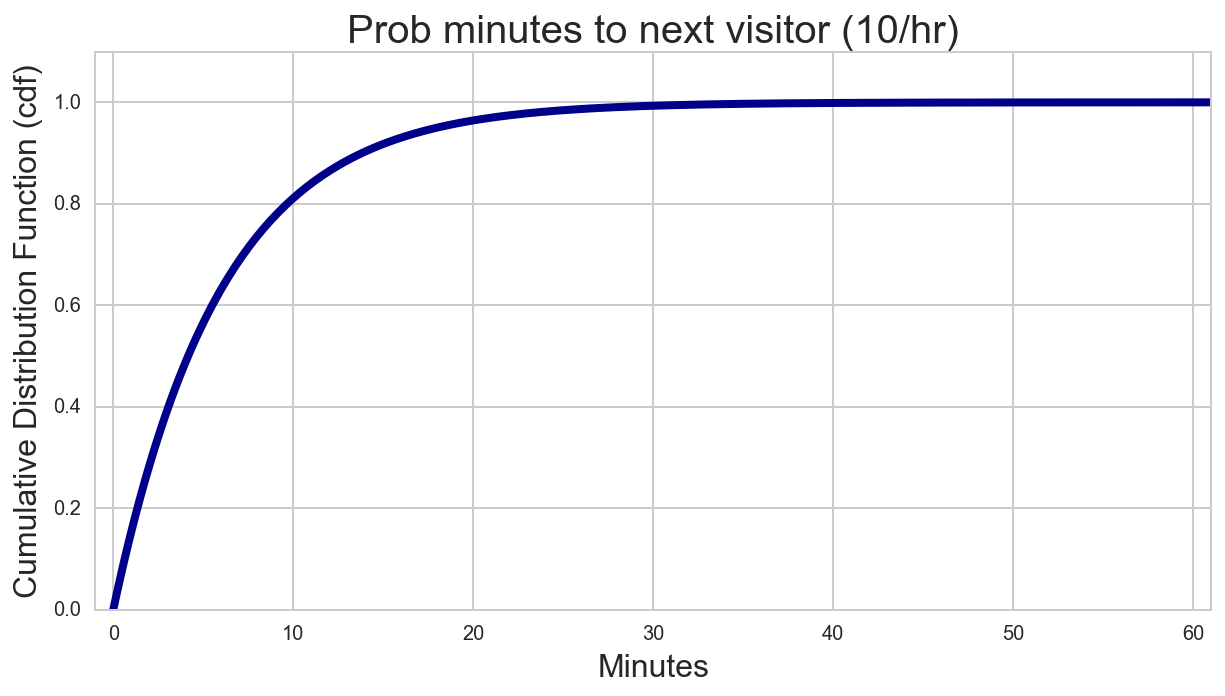

In [67]:
plot_continuous_cdf(0, 60, title= 'Prob minutes to next visitor (10/hr)', 
                     stats_dist=stats.expon(scale=1./(1./6.)), xlabel='Minutes')

<a id='normal'></a>

### The Normal distribution

---

The normal distribution is the most well known and arguably most important distribution in statistics. The normal distribution models the sum of random variables from _any_ distribution. This is the central limit theorem, which we discuss in greater detail in another lecture.

For example, the sum of a series of Bernoulli trials will be normally distributed the more trials are summed together. If this is confusing, it is important to remember that the normal distribution is a random variable _representing the probabilities of outcomes from summing the Bernoulli trials_. It models the possible sums.

There are some caveats to the idea that the sum of random variables will be normally distributed, but it holds true in most cases. Because of the central limit theorem, the normal distribution appears all the time in the real world.



#### Normal probability density function

The probability density function of the normal distribution is given by:

### $$ pdf(x \; | \; \mu, \sigma^2) = \frac{1}{\sqrt{2\sigma^2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

Here, $\mu$ is the mean of the distribution,

and $\sigma^2$ is the variance of the distribution.

Thus, a Normal distribution its perameters set by it's mean and variance.

Let's return to our Poisson variable example. Say we are measuring the number of users that come to our website. The rate of visitors to our site is 25 per hour. We measure the number of visitors that come to our site on 500 different hours:

In [68]:
visitors = stats.poisson(25).rvs(500)

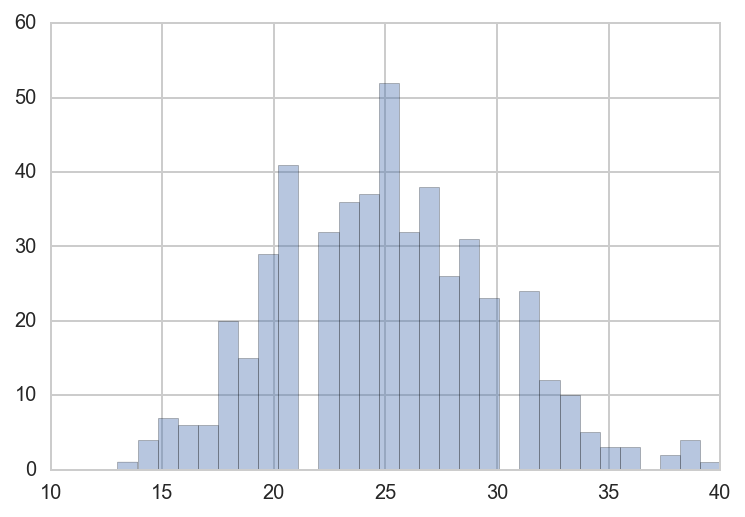

In [69]:
sns.distplot(visitors, bins=30, kde=False)

The visitor count histogram for the 500 different hour measurements is approximately normally distributed.

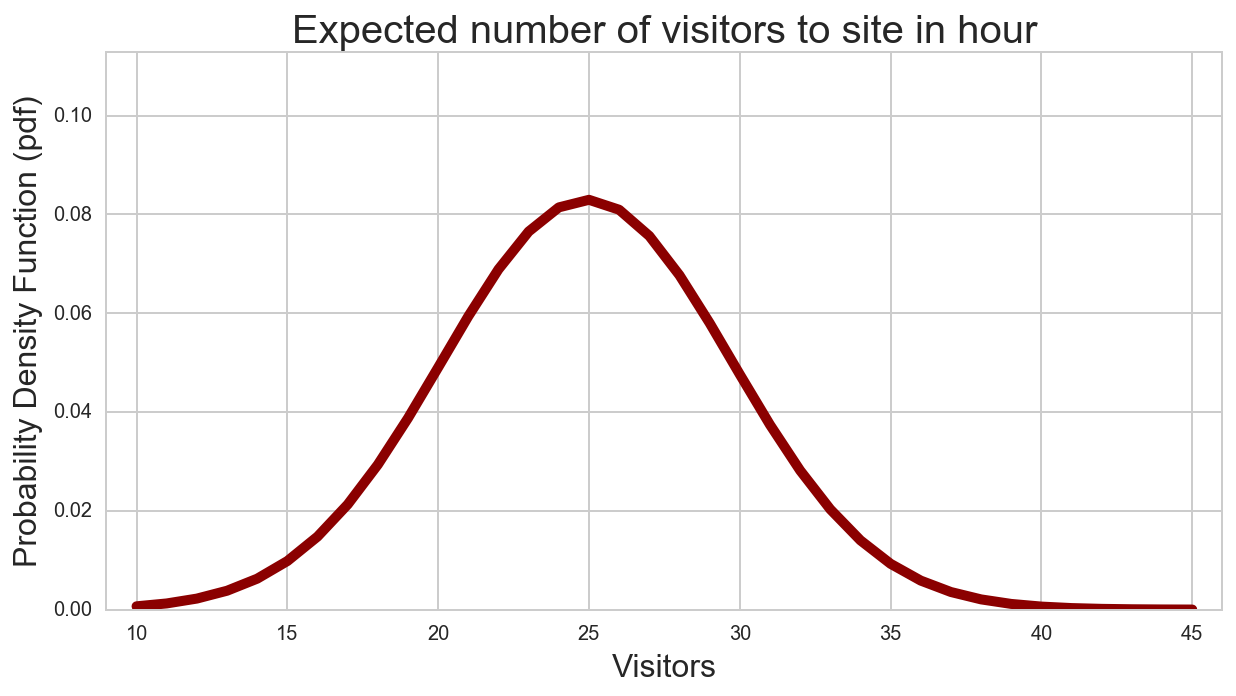

In [70]:
plot_continuous_pdf(10, 45, title='Expected number of visitors to site in hour', 
                     stats_dist=stats.norm(np.mean(visitors), np.std(visitors)), xlabel='Visitors')

#### Normal cumulative distribution function

[The Normal cumulative distribution function has to be approximated.](https://en.wikipedia.org/wiki/Normal_distribution#Definition) See the linked page for the details on how it is calculated. 

Here we can plot it here using the `scipy` module.

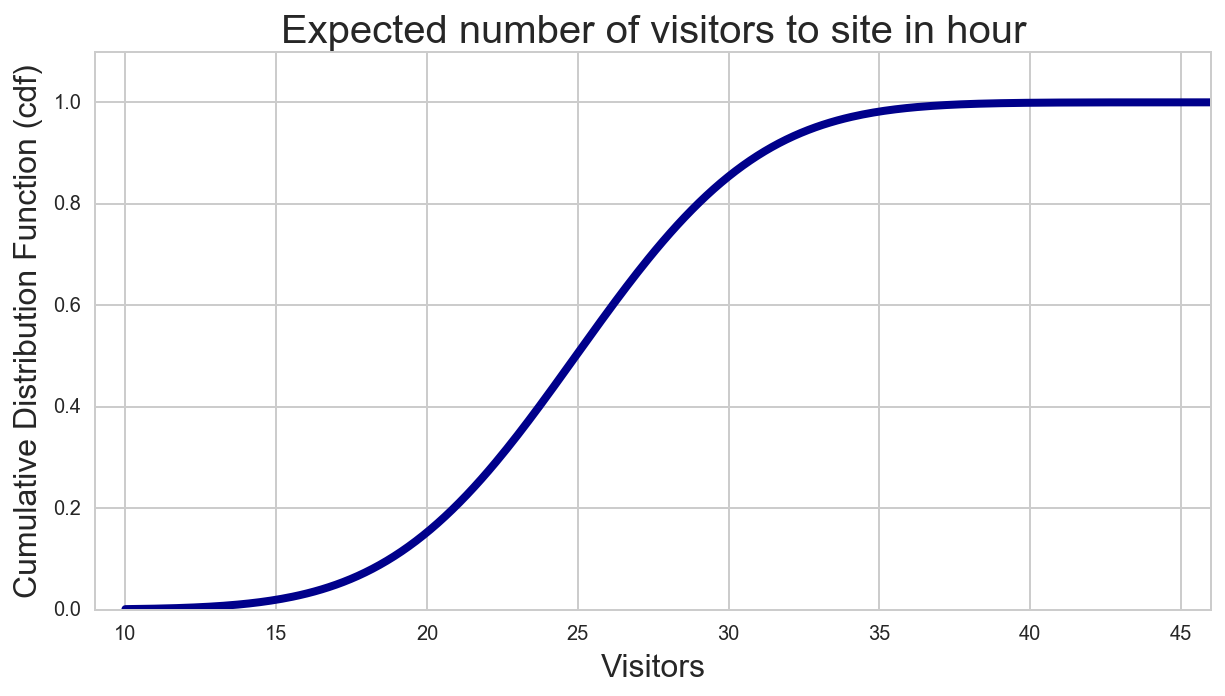

In [71]:
plot_continuous_cdf(10, 45, title='Expected number of visitors to site in hour', 
                    stats_dist=stats.norm(np.mean(visitors), np.std(visitors)), xlabel='Visitors')